In [171]:
## DOC: 
# - https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
# - http://www.statsmodels.org/devel/graphics.html

# https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ccpr.htm

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.graphics.api as smg
from statsmodels.graphics.plot_grids import scatter_ellipse

In [173]:
plt.style.use('seaborn')
plt.rc("axes.spines", top=False, right=False)  
plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['figure.figsize'] = (10, 6)

In [138]:
data = sm.datasets.statecrime.load_pandas().data

In [139]:
# sns.pairplot(data, height=1.5)

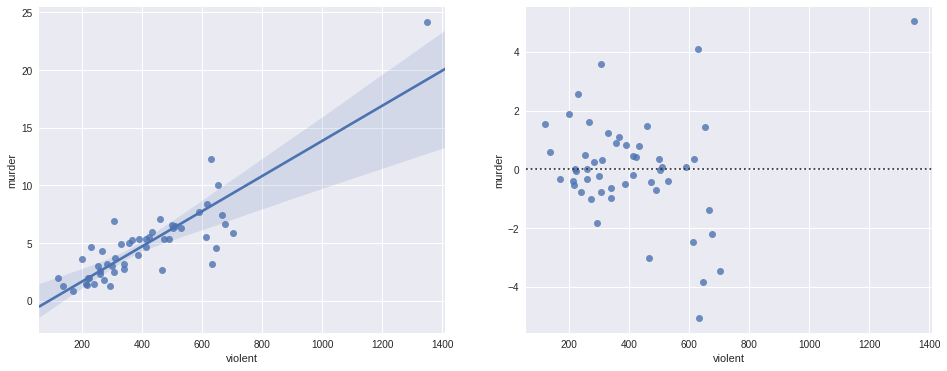

In [140]:
fig = plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.regplot(y='murder', x='violent', data = data)
plt.subplot(1,2,2)
sns.residplot(y='murder', x='violent', data = data)

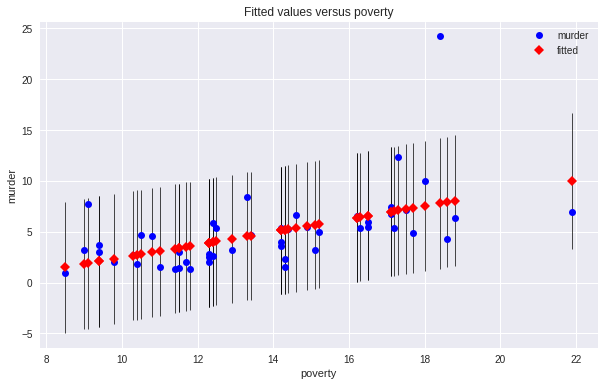

In [126]:
### Fit Plot
# Plot fit against one regressor
#
# Scatterplot of observed values compared to fitted values.

formula = 'murder ~ poverty'
results = smf.ols(formula=formula, data=data).fit()

sm.graphics.plot_fit(results, exog_idx='poverty');

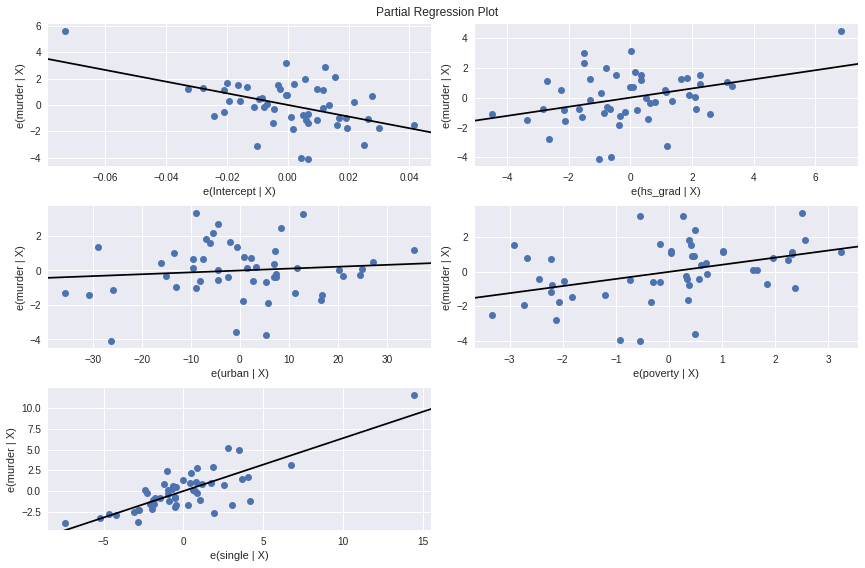

In [134]:
#### Partial regression plots
# = added variable plots, adjusted variable plots, individual coefficient plots.

## Problem: 
# Scatter plots of the response variable against each of the independent variables, 
# this does not take into account the effect of the other independent variables in the model.

## Partial regression plots 
# Attempt to show the effect of adding an additional variable to the model 
# (given that one or more indpendent variables are already in the model). 

## Partial regression plots are formed by:
# 1. Compute the residuals of regressing the response variable 
#    against the indpendent variables but omitting X_i
# 2. Compute the residuals from regressing X_i against the remaining indpendent variables
# 3. Plot the residuals from (1) against the residuals from (2).

# Mathematically: Y_{.[i]} versus X_{i.[i]}

# https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/partregr.htm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

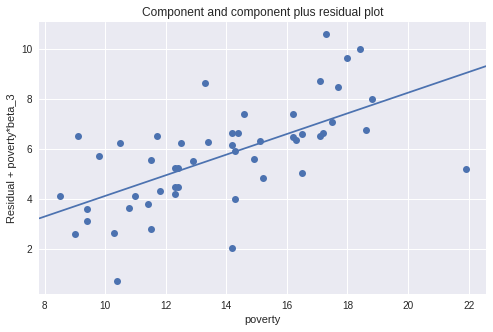

In [192]:
### CCPR 

### "CCPR": Component and Component Plus Residual 
# Extension of Partial RESIDUAL(!!!!!)plot 

## Problem: Partial RESIDUAL 
#
# Formed by: Res + β̂_i Xi versus X_i   
# (res = residuals of full model, and β̂_i also from full model)
#
# In SLR, scatter plot of response bs independent variable 
#      provides good indication of the nature of the relationship. 
# In MLR  scatter plots of response vs each independent variables, 
#      DOES NOT TAKE INTO ACCOUNT the effect of the other independent vars in model
# Tries show relationship between given independent and response 
#      given that other independent variables are also in the model
# ===> Problem: if X_i is highly correlated with any of the other independent variables
#               the variance indicated by the partial residual plot can be much less than the actual variance.

## Solution CCPR: 
#
# Also generates a partial residual plot but also adds
#
#     β̂_i X_i versus X_i
#
# => this is the "component" part of the plot 
#    Intended to show where the "fitted line" would lie.

# https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ccpr.htm


fig, ax = plt.subplots(figsize=(8, 5))
fig = sm.graphics.plot_ccpr(results, "poverty", ax=ax)

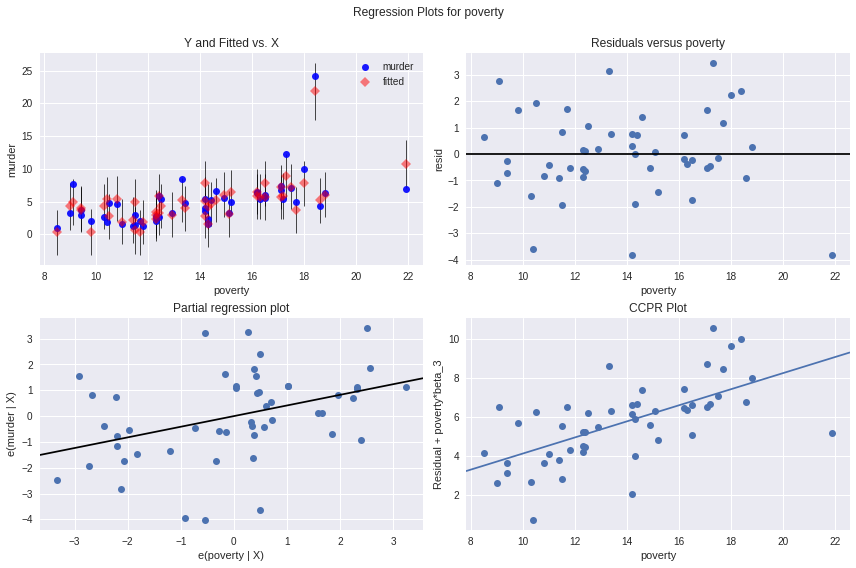

In [169]:
##### In-depth REGRESSION RESULTS analysis for one regressor 
##### Regression RESULTS Plot
# => Single Variable Regression Diagnostics
#    plot_regress_exog function is convenience function 
#
# Plot regression results against one regressor

### "Y and Fitted vs. X" 
# Plots dependent variable against predicted values with a confidence interval
# Also shows correlation between predictor and dependent

### “Residuals versus predictor” 
# Model's errors versus the specified predictor variable. 
# Each dot is an observed value - line represents  mean of observed values

    
fig = plt.figure(figsize=(12, 8))
results = smf.ols('murder ~ hs_grad + urban + poverty + single', data=crime_data.data).fit()

sm.graphics.plot_regress_exog(results, 'poverty', fig=fig);

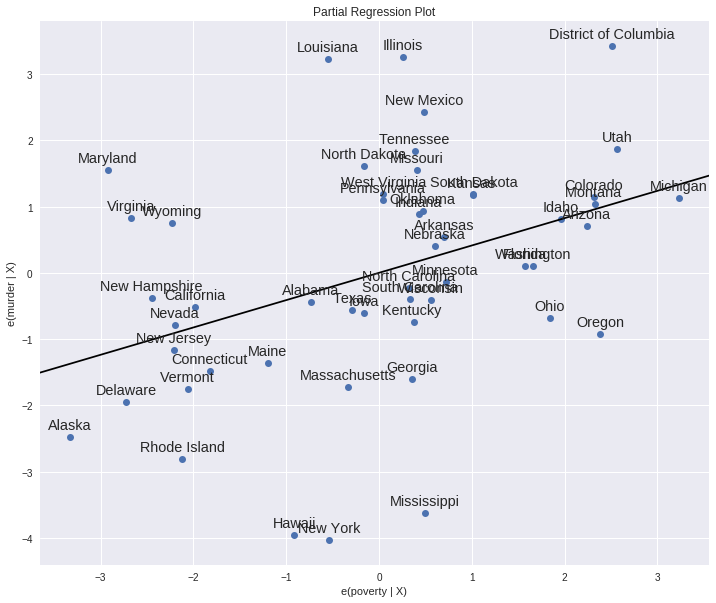

In [198]:
### Partial Regression 
# Plot partial regression for a single regressor
# (as included in "In-depth REGRESSION RESULTS analysis for one regressor" BUT more options)
fig, ax = plt.subplots(figsize=(12, 10))
sm.graphics.plot_partregress(endog='murder', 
                             exog_i='poverty', 
                             exog_others=['urban', 'hs_grad', 'single'], 
                             data=data,
                             obs_labels=True,
                             ax=ax);
# => function does not use formula syntax 

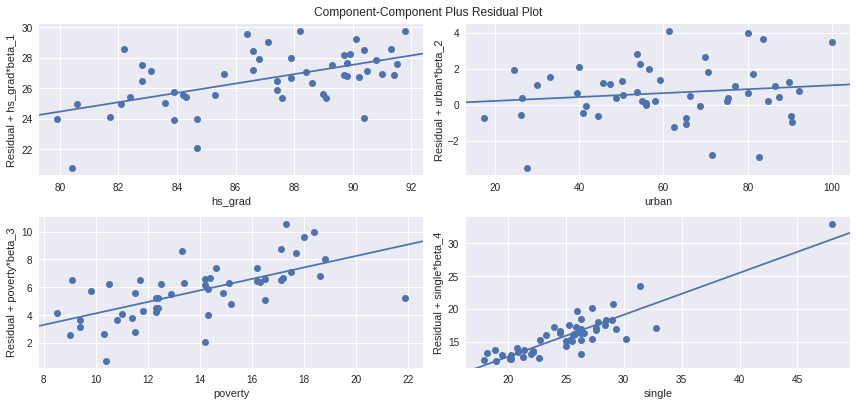

In [188]:
### CCPR grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_ccpr_grid(results,fig=fig);

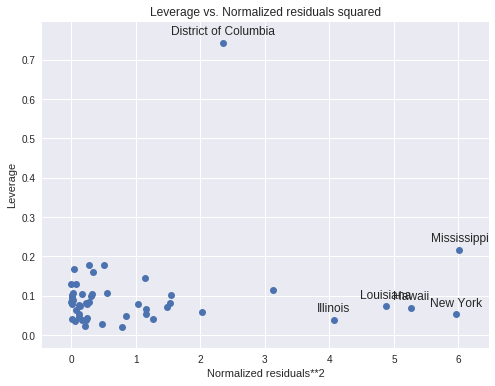

In [200]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

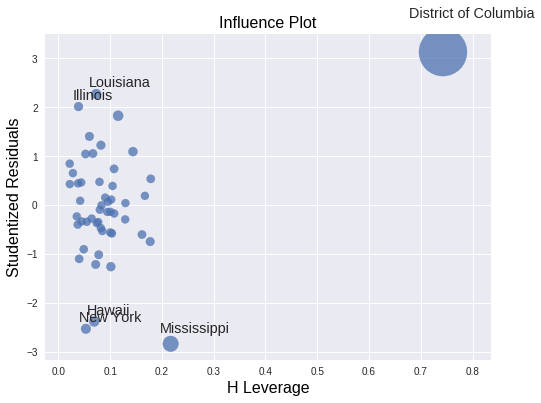

In [201]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(results, ax=ax)

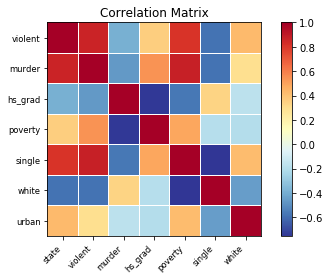

In [35]:
corr_matrix = np.corrcoef(crime_data.data.T)
smg.plot_corr(corr_matrix, xnames=crime_data.names,)
plt.show()

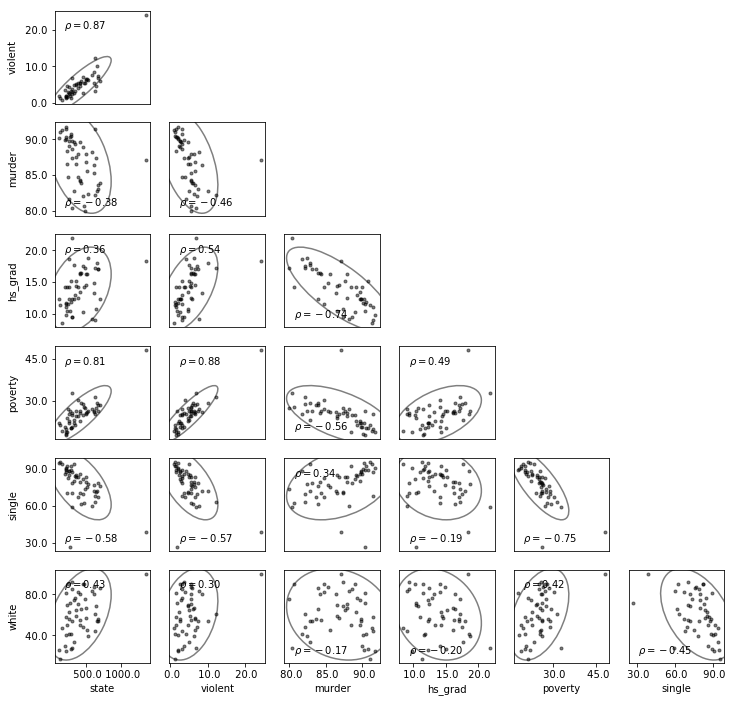

In [55]:
fig = plt.figure(figsize=(12, 12))
scatter_ellipse(crime_data.data, varnames=crime_data.names,fig=fig)
plt.show()